In [2]:
pip install transformers datasets torch scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
# Import Libraries
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load GoEmotions Dataset from HuggingFace
dataset = load_dataset("go_emotions")

# Take the train split
df = pd.DataFrame(dataset['train'])

# Preview the data
print("Sample Data:")
print(df.head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

Sample Data:
                                                text labels       id
0  My favourite food is anything I didn't have to...   [27]  eebbqej
1  Now if he does off himself, everyone will thin...   [27]  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING    [2]  eezlygj
3                        To make her feel threatened   [14]  ed7ypvh
4                             Dirty Southern Wankers    [3]  ed0bdzj


In [8]:
# Emotion labels (list of integers, could be multi-label)
# Load label names from the dataset features
label_names = dataset['train'].features['labels'].feature.names
print(f"\nNumber of emotion labels: {len(label_names)}")
print(f"Emotion labels: {label_names}")


Number of emotion labels: 28
Emotion labels: ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [9]:
# Function to convert list of label IDs to their names
def convert_labels(label_list):
    return [label_names[i] for i in label_list]

In [10]:
# Apply the function to a new column
df['emotion_names'] = df['labels'].apply(convert_labels)

# Preview processed data
print("\nProcessed Data Sample:")
print(df[['text', 'emotion_names']].head())


Processed Data Sample:
                                                text emotion_names
0  My favourite food is anything I didn't have to...     [neutral]
1  Now if he does off himself, everyone will thin...     [neutral]
2                     WHY THE FUCK IS BAYLESS ISOING       [anger]
3                        To make her feel threatened        [fear]
4                             Dirty Southern Wankers   [annoyance]


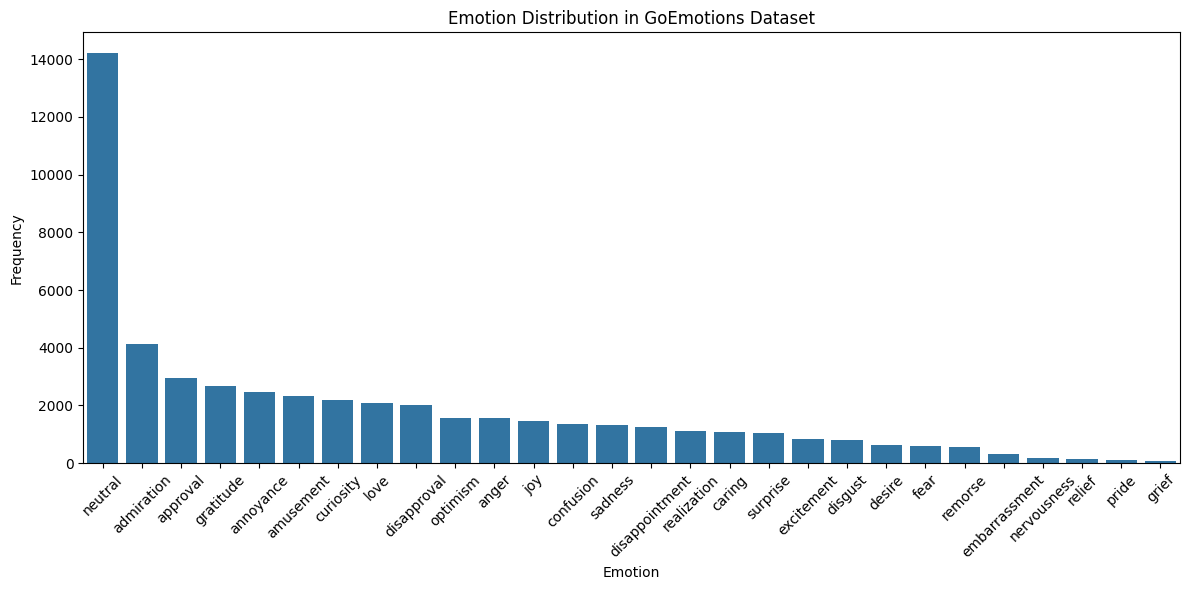

In [11]:
# Plot emotion distribution (flatten all labels)
all_labels = sum(df['labels'], [])
label_counts = pd.Series(all_labels).value_counts().sort_values(ascending=False)
label_names_sorted = [label_names[i] for i in label_counts.index]

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(x=label_names_sorted, y=label_counts.values)
plt.xticks(rotation=45)
plt.title("Emotion Distribution in GoEmotions Dataset")
plt.ylabel("Frequency")
plt.xlabel("Emotion")
plt.tight_layout()
plt.show()


In [12]:
# Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MultiLabelBinarizer

In [13]:
# Binarize multi-labels for sklearn
mlb = MultiLabelBinarizer(classes=list(range(len(label_names))))
y = mlb.fit_transform(df['labels'])

In [14]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X = vectorizer.fit_transform(df['text'])

In [15]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Train Logistic Regression model (one-vs-rest)
clf = LogisticRegression(max_iter=1000)
from sklearn.multiclass import OneVsRestClassifier
model = OneVsRestClassifier(clf)
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [17]:
# Predict on test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=label_names))


                precision    recall  f1-score   support

    admiration       0.75      0.34      0.47       863
     amusement       0.78      0.49      0.61       453
         anger       0.70      0.13      0.22       323
     annoyance       0.46      0.02      0.04       483
      approval       0.67      0.06      0.11       577
        caring       0.83      0.05      0.09       212
     confusion       0.65      0.05      0.09       258
     curiosity       0.80      0.04      0.08       460
        desire       0.71      0.17      0.28       128
disappointment       0.60      0.01      0.02       244
   disapproval       0.38      0.01      0.02       383
       disgust       0.81      0.13      0.23       156
 embarrassment       0.50      0.02      0.03        58
    excitement       0.62      0.10      0.18       175
          fear       0.60      0.10      0.18       116
     gratitude       0.97      0.77      0.86       544
         grief       0.00      0.00      0.00  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# DistilBert Model

In [18]:
# Import libraries
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import DistilBertTokenizerFast, DistilBertModel
from sklearn.metrics import f1_score

In [19]:
# Load dataset
dataset = load_dataset("go_emotions")
df = pd.DataFrame(dataset['train'])

In [20]:
# Prepare labels
label_names = dataset['train'].features['labels'].feature.names
num_labels = len(label_names)
mlb = MultiLabelBinarizer(classes=list(range(num_labels)))
labels = mlb.fit_transform(df['labels'])

In [21]:
# Split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'], labels, test_size=0.2, random_state=42)

In [22]:
# Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, return_tensors='pt')
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, return_tensors='pt')


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [23]:
# Dataset class
class GoEmotionsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels).float()
    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    def __len__(self):
        return len(self.labels)

train_dataset = GoEmotionsDataset(train_encodings, train_labels)
val_dataset = GoEmotionsDataset(val_encodings, val_labels)

In [24]:
# Dataloaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64)


In [25]:
# Model
class DistilBertEmotionClassifier(nn.Module):
    def __init__(self, num_labels):
        super().__init__()
        self.bert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)
    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.classifier(outputs.last_hidden_state[:, 0, :])  # CLS token
        return logits

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DistilBertEmotionClassifier(num_labels).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.BCEWithLogitsLoss()

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [27]:
# Training loop
epochs = 2
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        logits = model(input_ids, attention_mask)
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} - Training Loss: {total_loss / len(train_loader):.4f}")

Epoch 1 - Training Loss: 0.1197
Epoch 2 - Training Loss: 0.0839


In [28]:
    # Evaluation
    model.eval()
    preds, true = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].cpu().numpy()
            logits = model(input_ids, attention_mask).cpu()
            pred = torch.sigmoid(logits).numpy()
            preds.append(pred)
            true.append(labels)
    preds = np.concatenate(preds) > 0.5
    true = np.concatenate(true)
    f1 = f1_score(true, preds, average='micro')
    print(f"Epoch {epoch+1} - Validation F1 (micro): {f1:.4f}")


Epoch 2 - Validation F1 (micro): 0.5505


# build_seq2seq_model_with_just_lstm

In [29]:
import torch
import torch.nn as nn

class Seq2SeqLSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super(Seq2SeqLSTM, self).__init__()

        # Encoder
        self.encoder_embedding = nn.Embedding(input_dim, embedding_dim)
        self.encoder_lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)

        # Decoder
        self.decoder_lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.decoder_output = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src, trg):
        # Encoder forward
        embedded = self.encoder_embedding(src)
        _, (hidden, cell) = self.encoder_lstm(embedded)

        # Decoder forward
        decoder_input = trg.unsqueeze(1)  # Add batch size dimension for decoder input
        decoder_input = self.encoder_embedding(decoder_input)  # Embed the target sequence
        outputs, _ = self.decoder_lstm(decoder_input, (hidden, cell))

        # Final output (Linear layer)
        output = self.decoder_output(outputs)

        return output


In [30]:
#Inference: build_seq2seq_model_with_just_lstm_inference
def build_seq2seq_model_with_just_lstm_inference(model, input_seq, device):
    model.eval()  # Set model to evaluation mode
    input_tensor = torch.tensor(input_seq).to(device)

    with torch.no_grad():
        # Pass input through the model (only encoder part)
        embedded = model.encoder_embedding(input_tensor)
        _, (hidden, cell) = model.encoder_lstm(embedded)

        # Generate the output sequence using decoder
        decoder_input = input_tensor[0].unsqueeze(0).unsqueeze(0)  # Start with the first token (e.g. <SOS>)
        decoder_input = model.encoder_embedding(decoder_input)
        decoder_output, _ = model.decoder_lstm(decoder_input, (hidden, cell))

        output = model.decoder_output(decoder_output)

    return output


In [31]:
#decode_sequence_build_seq2seq_model_with_just_lstm
def decode_sequence_build_seq2seq_model_with_just_lstm(model, input_seq, device, max_len=50):
    model.eval()
    input_tensor = torch.tensor(input_seq).to(device)

    # Start with the encoder part (similar to inference)
    embedded = model.encoder_embedding(input_tensor)
    _, (hidden, cell) = model.encoder_lstm(embedded)

    # Initialize decoder with the <SOS> token (usually 0)
    decoder_input = torch.tensor([0]).unsqueeze(0).to(device)
    decoder_input = model.encoder_embedding(decoder_input)

    # Collect the generated sequence
    decoded_seq = []
    for _ in range(max_len):
        output, (hidden, cell) = model.decoder_lstm(decoder_input, (hidden, cell))
        output = model.decoder_output(output)

        # Get the most probable token for the output
        _, predicted_token = output.topk(1)
        predicted_token = predicted_token.squeeze(0).item()

        decoded_seq.append(predicted_token)

        # Update the input for the next step in the decoder (teacher forcing can be applied here)
        decoder_input = model.encoder_embedding(torch.tensor([predicted_token]).unsqueeze(0).to(device))

    return decoded_seq


# build_seq2seq_model_with_bidirectional_lstm

In [32]:
class Seq2SeqBidirectionalLSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super(Seq2SeqBidirectionalLSTM, self).__init__()

        # Encoder: Bidirectional LSTM
        self.encoder_embedding = nn.Embedding(input_dim, embedding_dim)
        self.encoder_lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True, bidirectional=True)

        # Decoder: Unidirectional LSTM
        self.decoder_lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.decoder_output = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src, trg):
        # Encoder forward
        embedded = self.encoder_embedding(src)
        _, (hidden, cell) = self.encoder_lstm(embedded)

        # Decoder forward
        decoder_input = trg.unsqueeze(1)
        decoder_input = self.encoder_embedding(decoder_input)
        outputs, _ = self.decoder_lstm(decoder_input, (hidden, cell))

        # Final output
        output = self.decoder_output(outputs)
        return output


In [33]:
#build_seq2seq_model_with_bidirectional_lstm_inference
def build_seq2seq_model_with_bidirectional_lstm_inference(model, input_seq, device):
    model.eval()
    input_tensor = torch.tensor(input_seq).to(device)

    with torch.no_grad():
        # Pass input through the model (encoder part with bidirectional LSTM)
        embedded = model.encoder_embedding(input_tensor)
        _, (hidden, cell) = model.encoder_lstm(embedded)

        # Decoder part (use last hidden and cell state)
        decoder_input = input_tensor[0].unsqueeze(0).unsqueeze(0)
        decoder_input = model.encoder_embedding(decoder_input)
        decoder_output, _ = model.decoder_lstm(decoder_input, (hidden, cell))

        output = model.decoder_output(decoder_output)

    return output

In [34]:
#decode_sequence_build_seq2seq_model_with_bidirectional_lstm
def decode_sequence_build_seq2seq_model_with_bidirectional_lstm(model, input_seq, device, max_len=50):
    model.eval()
    input_tensor = torch.tensor(input_seq).to(device)

    # Encoder part (Bidirectional LSTM)
    embedded = model.encoder_embedding(input_tensor)
    _, (hidden, cell) = model.encoder_lstm(embedded)

    # Initialize decoder input (starting with <SOS>)
    decoder_input = torch.tensor([0]).unsqueeze(0).to(device)
    decoder_input = model.encoder_embedding(decoder_input)

    # Collect the generated sequence
    decoded_seq = []
    for _ in range(max_len):
        output, (hidden, cell) = model.decoder_lstm(decoder_input, (hidden, cell))
        output = model.decoder_output(output)

        # Get the most probable token
        _, predicted_token = output.topk(1)
        predicted_token = predicted_token.squeeze(0).item()

        decoded_seq.append(predicted_token)

        # Update the decoder input for the next step
        decoder_input = model.encoder_embedding(torch.tensor([predicted_token]).unsqueeze(0).to(device))

    return decoded_seq

# build_hybrid_seq2seq_model

In [35]:
class HybridSeq2SeqLSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super(HybridSeq2SeqLSTM, self).__init__()

        # Encoder: Bidirectional LSTM
        self.encoder_embedding = nn.Embedding(input_dim, embedding_dim)
        self.encoder_lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True, bidirectional=True)

        # Decoder: Unidirectional LSTM
        self.decoder_lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.decoder_output = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, src, trg):
        # Encoder forward
        embedded = self.encoder_embedding(src)
        _, (hidden, cell) = self.encoder_lstm(embedded)

        # Decoder forward
        decoder_input = trg.unsqueeze(1)
        decoder_input = self.encoder_embedding(decoder_input)
        outputs, _ = self.decoder_lstm(decoder_input, (hidden, cell))

        # Final output
        output = self.decoder_output(outputs)
        return output

In [36]:
#build_hybrid_seq2seq_model_inference
def build_hybrid_seq2seq_model_inference(model, input_seq, device):
    model.eval()
    input_tensor = torch.tensor(input_seq).to(device)

    with torch.no_grad():
        # Pass input through the encoder part (Bidirectional LSTM)
        embedded = model.encoder_embedding(input_tensor)
        _, (hidden, cell) = model.encoder_lstm(embedded)

        # Decoder part
        decoder_input = input_tensor[0].unsqueeze(0).unsqueeze(0)
        decoder_input = model.encoder_embedding(decoder_input)
        decoder_output, _ = model.decoder_lstm(decoder_input, (hidden, cell))

        output = model.decoder_output(decoder_output)

    return output


In [37]:
#decode_sequence_build_hybrid_seq2seq_model
def decode_sequence_build_hybrid_seq2seq_model(model, input_seq, device, max_len=50):
    model.eval()
    input_tensor = torch.tensor(input_seq).to(device)

    # Encoder part (Bidirectional LSTM)
    embedded = model.encoder_embedding(input_tensor)
    _, (hidden, cell) = model.encoder_lstm(embedded)

    # Initialize decoder input (start with <SOS>)
    decoder_input = torch.tensor([0]).unsqueeze(0).to(device)
    decoder_input = model.encoder_embedding(decoder_input)

    # Collect the generated sequence
    decoded_seq = []
    for _ in range(max_len):
        output, (hidden, cell) = model.decoder_lstm(decoder_input, (hidden, cell))
        output = model.decoder_output(output)

        # Get the most probable token
        _, predicted_token = output.topk(1)
        predicted_token = predicted_token.squeeze(0).item()

        decoded_seq.append(predicted_token)

        # Update the decoder input for the next step
        decoder_input = model.encoder_embedding(torch.tensor([predicted_token]).unsqueeze(0).to(device))

    return decoded_seq

In [38]:
# Basic Configs
input_dim = 100
embedding_dim = 64
hidden_dim = 128
output_dim = 100
n_layers = 2
dropout = 0.3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [39]:
model = Seq2SeqLSTM(input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout).to(device)

In [40]:
sample_input = torch.randint(0, input_dim, (1, 10)).to(device)
sample_target = torch.randint(0, input_dim, (1,)).to(device)

output = model(sample_input, sample_target)

print("Model output shape:", output.shape)
print("Sample output logits:", output)


Model output shape: torch.Size([1, 1, 100])
Sample output logits: tensor([[[ 0.0910, -0.0543, -0.0089,  0.0745, -0.0581,  0.0397,  0.0200,
           0.0206,  0.0077, -0.0410,  0.0162, -0.1044, -0.0256, -0.0457,
          -0.1073,  0.1035, -0.0396,  0.0259, -0.0028, -0.0537, -0.0790,
           0.0611,  0.0679, -0.0134,  0.0181,  0.0314, -0.0460, -0.0266,
           0.0757,  0.0729, -0.0280, -0.0172, -0.0549, -0.0052,  0.0295,
           0.0409,  0.0681,  0.1109,  0.0343, -0.0092, -0.0813, -0.0702,
          -0.0271, -0.0855, -0.0745, -0.0863,  0.1231, -0.0893,  0.0444,
          -0.0335,  0.0905, -0.0059,  0.0198, -0.0242,  0.0158,  0.0496,
           0.0077,  0.0292, -0.0969,  0.0557, -0.0349,  0.0123, -0.0820,
           0.0195,  0.0368,  0.0666,  0.0369,  0.0271,  0.0219,  0.0156,
           0.0952, -0.0546, -0.0220, -0.0571, -0.0802, -0.0312, -0.0081,
           0.0956,  0.0102, -0.1048,  0.0287,  0.0690,  0.0770,  0.0820,
           0.0542,  0.0394,  0.0511, -0.0564, -0.0020,  0.

In [42]:
import torch
import torch.nn as nn

# ----- Configuration -----
input_dim = 100          # Vocabulary size
embedding_dim = 64       # Embedding dimension
hidden_dim = 128         # Hidden state size
output_dim = 100         # Output vocabulary size
n_layers = 2             # Number of LSTM layers
dropout = 0.3            # Dropout probability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# ----- Model 1: Seq2Seq with Just LSTM -----
class Seq2SeqLSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super(Seq2SeqLSTM, self).__init__()
        self.encoder_embedding = nn.Embedding(input_dim, embedding_dim)
        self.encoder_lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.decoder_lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True)
        self.decoder_output = nn.Linear(hidden_dim, output_dim)

    def forward(self, src, trg):
        embedded = self.encoder_embedding(src)
        _, (hidden, cell) = self.encoder_lstm(embedded)
        decoder_input = self.encoder_embedding(trg.unsqueeze(1))
        outputs, _ = self.decoder_lstm(decoder_input, (hidden, cell))
        output = self.decoder_output(outputs)
        return output


# ----- Model 2: Seq2Seq with Bidirectional LSTM -----
class Seq2SeqBidirectionalLSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super(Seq2SeqBidirectionalLSTM, self).__init__()
        self.encoder_embedding = nn.Embedding(input_dim, embedding_dim)
        self.encoder_lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True, bidirectional=True)
        self.decoder_lstm = nn.LSTM(embedding_dim, hidden_dim * 2, n_layers, dropout=dropout, batch_first=True)
        self.decoder_output = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, src, trg):
        embedded = self.encoder_embedding(src)
        _, (hidden, cell) = self.encoder_lstm(embedded)

        # Merge the bidirectional outputs
        def concat_directions(h):
            return torch.cat((h[0:h.size(0):2], h[1:h.size(0):2]), dim=2)

        hidden = concat_directions(hidden)
        cell = concat_directions(cell)

        decoder_input = self.encoder_embedding(trg.unsqueeze(1))
        outputs, _ = self.decoder_lstm(decoder_input, (hidden, cell))
        output = self.decoder_output(outputs)
        return output


# ----- Model 3: Hybrid (BiLSTM Encoder + LSTM Decoder) -----
class HybridSeq2SeqLSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout):
        super(HybridSeq2SeqLSTM, self).__init__()
        self.encoder_embedding = nn.Embedding(input_dim, embedding_dim)
        self.encoder_lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=dropout, batch_first=True, bidirectional=True)
        self.decoder_lstm = nn.LSTM(embedding_dim, hidden_dim * 2, n_layers, dropout=dropout, batch_first=True)
        self.decoder_output = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, src, trg):
        embedded = self.encoder_embedding(src)
        _, (hidden, cell) = self.encoder_lstm(embedded)

        # Merge the bidirectional outputs
        def concat_directions(h):
            return torch.cat((h[0:h.size(0):2], h[1:h.size(0):2]), dim=2)

        hidden = concat_directions(hidden)
        cell = concat_directions(cell)

        decoder_input = self.encoder_embedding(trg.unsqueeze(1))
        outputs, _ = self.decoder_lstm(decoder_input, (hidden, cell))
        output = self.decoder_output(outputs)
        return output


# ----- Sample Input for Testing -----
sample_input = torch.randint(0, input_dim, (1, 10)).to(device)  # (batch_size=1, seq_len=10)
sample_target = torch.randint(0, input_dim, (1,)).to(device)    # one target token

# ----- Run All Models -----

# Model 1: Just LSTM
model1 = Seq2SeqLSTM(input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout).to(device)
output1 = model1(sample_input, sample_target)
print("Model 1 (Just LSTM) output shape:", output1.shape)

# Model 2: Bidirectional LSTM
model2 = Seq2SeqBidirectionalLSTM(input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout).to(device)
output2 = model2(sample_input, sample_target)
print("Model 2 (BiLSTM) output shape:", output2.shape)

# Model 3: Hybrid
model3 = HybridSeq2SeqLSTM(input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout).to(device)
output3 = model3(sample_input, sample_target)
print("Model 3 (Hybrid) output shape:", output3.shape)


Model 1 (Just LSTM) output shape: torch.Size([1, 1, 100])
Model 2 (BiLSTM) output shape: torch.Size([1, 1, 100])
Model 3 (Hybrid) output shape: torch.Size([1, 1, 100])


In [43]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Use one of the models to test (e.g. model1)
model = Seq2SeqLSTM(input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dummy dataset (batch of sentences)
num_epochs = 20
losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Fake input and target for demonstration
    input_seq = torch.randint(0, input_dim, (8, 10)).to(device)   # batch of 8 samples
    target_token = torch.randint(0, input_dim, (8,)).to(device)

    # Forward pass
    output = model(input_seq, target_token)  # output shape: (8, 1, 100)
    output = output.squeeze(1)               # reshape to (8, 100)

    # Compute loss
    loss = criterion(output, target_token)
    losses.append(loss.item())

    # Backward and optimize
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [1/20], Loss: 4.6182
Epoch [2/20], Loss: 4.5948
Epoch [3/20], Loss: 4.5817
Epoch [4/20], Loss: 4.5701
Epoch [5/20], Loss: 4.6217
Epoch [6/20], Loss: 4.5748
Epoch [7/20], Loss: 4.5957
Epoch [8/20], Loss: 4.5889
Epoch [9/20], Loss: 4.6332
Epoch [10/20], Loss: 4.6071
Epoch [11/20], Loss: 4.6346
Epoch [12/20], Loss: 4.6062
Epoch [13/20], Loss: 4.5639
Epoch [14/20], Loss: 4.5644
Epoch [15/20], Loss: 4.6177
Epoch [16/20], Loss: 4.6476
Epoch [17/20], Loss: 4.5967
Epoch [18/20], Loss: 4.5624
Epoch [19/20], Loss: 4.6380
Epoch [20/20], Loss: 4.5796


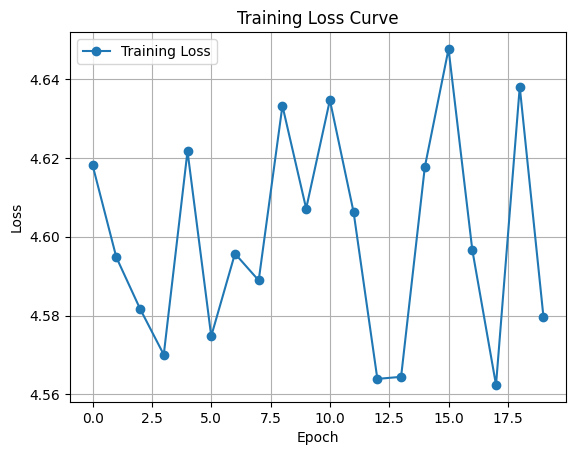

In [44]:
# Plot training loss curve
plt.plot(losses, label="Training Loss", marker="o")
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

In [47]:
def train_model(model, model_name, input_dim, num_epochs=20):
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    losses = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        # Fake data for illustration
        input_seq = torch.randint(0, input_dim, (8, 10)).to(device)   # batch of 8 samples
        target_token = torch.randint(0, input_dim, (8,)).to(device)

        # Forward pass
        output = model(input_seq, target_token)       # shape: (8, 1, output_dim)
        output = output.squeeze(1)                    # shape: (8, output_dim)

        # Compute loss
        loss = criterion(output, target_token)
        losses.append(loss.item())

        # Backward and optimize
        loss.backward()
        optimizer.step()

        print(f"[{model_name}] Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    return losses


In [48]:
# Re-initialize models
model1 = Seq2SeqLSTM(input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout)
model2 = Seq2SeqBidirectionalLSTM(input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout)
model3 = HybridSeq2SeqLSTM(input_dim, embedding_dim, hidden_dim, output_dim, n_layers, dropout)

# Train each model
losses1 = train_model(model1, "LSTM", input_dim)
losses2 = train_model(model2, "BiLSTM", input_dim)
losses3 = train_model(model3, "Hybrid", input_dim)


[LSTM] Epoch [1/20], Loss: 4.5951
[LSTM] Epoch [2/20], Loss: 4.6184
[LSTM] Epoch [3/20], Loss: 4.6131
[LSTM] Epoch [4/20], Loss: 4.6305
[LSTM] Epoch [5/20], Loss: 4.6289
[LSTM] Epoch [6/20], Loss: 4.6206
[LSTM] Epoch [7/20], Loss: 4.5808
[LSTM] Epoch [8/20], Loss: 4.6168
[LSTM] Epoch [9/20], Loss: 4.5848
[LSTM] Epoch [10/20], Loss: 4.6174
[LSTM] Epoch [11/20], Loss: 4.6347
[LSTM] Epoch [12/20], Loss: 4.6333
[LSTM] Epoch [13/20], Loss: 4.5739
[LSTM] Epoch [14/20], Loss: 4.5437
[LSTM] Epoch [15/20], Loss: 4.5643
[LSTM] Epoch [16/20], Loss: 4.6340
[LSTM] Epoch [17/20], Loss: 4.5967
[LSTM] Epoch [18/20], Loss: 4.6177
[LSTM] Epoch [19/20], Loss: 4.6186
[LSTM] Epoch [20/20], Loss: 4.5393
[BiLSTM] Epoch [1/20], Loss: 4.5938
[BiLSTM] Epoch [2/20], Loss: 4.6063
[BiLSTM] Epoch [3/20], Loss: 4.6166
[BiLSTM] Epoch [4/20], Loss: 4.6064
[BiLSTM] Epoch [5/20], Loss: 4.6255
[BiLSTM] Epoch [6/20], Loss: 4.5769
[BiLSTM] Epoch [7/20], Loss: 4.6102
[BiLSTM] Epoch [8/20], Loss: 4.6145
[BiLSTM] Epoch [9/20]

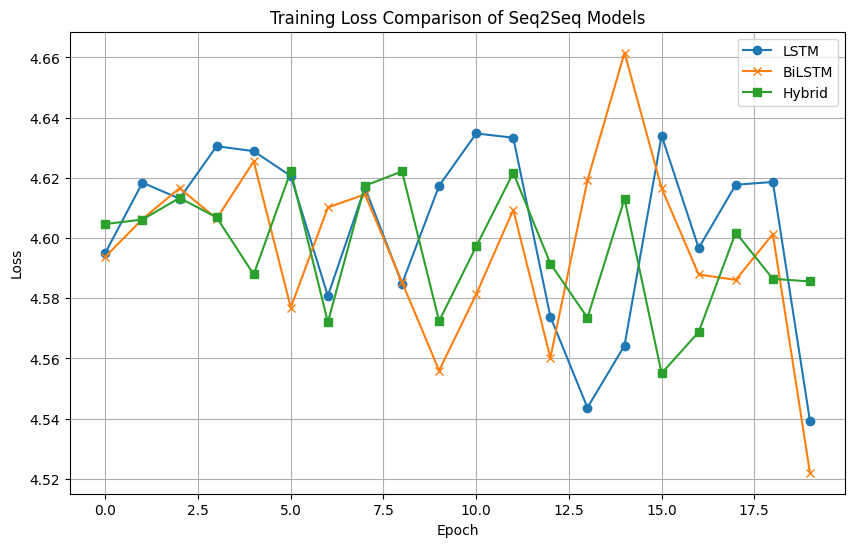

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(losses1, label="LSTM", marker='o')
plt.plot(losses2, label="BiLSTM", marker='x')
plt.plot(losses3, label="Hybrid", marker='s')

plt.title("Training Loss Comparison of Seq2Seq Models")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
